In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
from google.colab import drive
import os
# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder path inside Google Drive
folder_path = "/content/drive/My Drive/ML Datasets/Flowers"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Step 3: List the files in the folder
files = os.listdir(folder_path)

# Print the list of files
print("Files in the folder:", files)

Files in the folder: ['dandelion', 'tulip', 'sunflower', 'rose', 'daisy']


In [4]:
count = 0

# List all subdirectories in the main folder
dirs = os.listdir(folder_path)

for dir in dirs:
    dir_path = os.path.join(folder_path, dir)  # ✅ Correctly join folder path

    if os.path.isdir(dir_path):  # ✅ Ensure it's a directory
        files = os.listdir(dir_path)  # ✅ List files inside the subfolder
        print(f"{dir} Folder has {len(files)} Images")
        count += len(files)

print(f"Images Folder has {count} Images")

dandelion Folder has 639 Images
tulip Folder has 984 Images
sunflower Folder has 753 Images
rose Folder has 784 Images
daisy Folder has 764 Images
Images Folder has 3924 Images


In [5]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

IMG_SIZE = (64, 64)  # Resize all images
images = []
labels = []

# Use your existing folder path
for label in os.listdir(folder_path):
    dir_path = os.path.join(folder_path, label)

    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            try:
                img = cv2.imread(file_path)
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(label)
            except:
                pass  # skip unreadable files


In [6]:
images = np.array(images) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Convert string labels to numeric
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print("Classes:", le.classes_)

Classes: ['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, stratify=labels_encoded, random_state=42
)


In [8]:
# Flatten images for ANN (from 64x64x3 to 12288)
X_train_ann = X_train.reshape(len(X_train), -1)
X_test_ann = X_test.reshape(len(X_test), -1)

print("ANN input shape:", X_train_ann.shape)


ANN input shape: (3139, 12288)


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

ann_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train_ann.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')  # 5 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [11]:
history_ann = ann_model.fit(
    X_train_ann, y_train,
    validation_data=(X_test_ann, y_test),
    epochs=150,
    batch_size=16
)

Epoch 1/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2672 - loss: 3.8292 - val_accuracy: 0.3860 - val_loss: 1.4049
Epoch 2/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3484 - loss: 1.4638 - val_accuracy: 0.4064 - val_loss: 1.3128
Epoch 3/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3886 - loss: 1.3814 - val_accuracy: 0.3567 - val_loss: 1.3842
Epoch 4/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3808 - loss: 1.3892 - val_accuracy: 0.3796 - val_loss: 1.3885
Epoch 5/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3889 - loss: 1.3772 - val_accuracy: 0.4395 - val_loss: 1.3007
Epoch 6/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3932 - loss: 1.3759 - val_accuracy: 0.4000 - val_loss: 1.3108
Epoch 7/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3806 - loss: 1.3480 - val_accuracy: 0.4038 - val_loss: 1.3830
Epoch 8/150
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4204 - loss: 1.3184 - val_acc

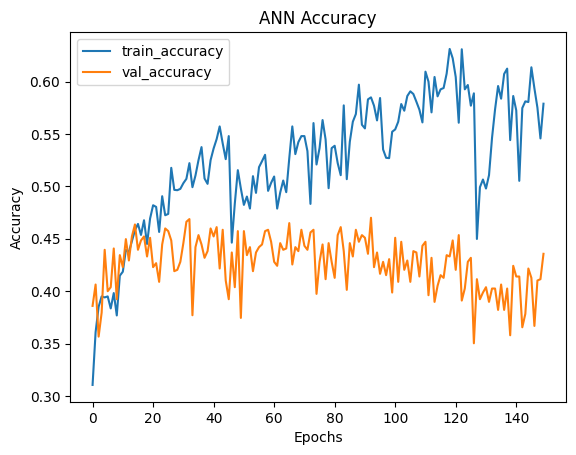

In [12]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model Accuracy"):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_ann, "ANN Accuracy")

In [13]:
loss, acc = ann_model.evaluate(X_test_ann, y_test)
print(f"Test Accuracy (ANN): {acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4456 - loss: 1.5709
Test Accuracy (ANN): 0.4357


In [18]:
#folder_path = "flowers"  # Path to your dataset folder
IMG_SIZE = (64, 64)

images = []
labels = []

for label in os.listdir(folder_path):
    dir_path = os.path.join(folder_path, label)

    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            try:
                img = cv2.imread(file_path)
                img = cv2.resize(img, IMG_SIZE)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                images.append(img)
                labels.append(label)
            except:
                pass  # skip unreadable files

images = np.array(images, dtype=np.float32) / 255.0  # Normalize
labels = np.array(labels)

# Encode string labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print("Class Labels:", le.classes_)

Class Labels: ['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded,
    test_size=0.2,
    stratify=labels_encoded,
    random_state=42
)

print("Train shape:", X_train.shape)  # Should now be (num_samples, 64, 64, 3)

Train shape: (3139, 64, 64, 3)


In [24]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(5, activation='softmax')  # 5 flower classes
])

In [25]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.4265 - loss: 1.5691 - val_accuracy: 0.1631 - val_loss: 2.8066
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5386 - loss: 1.1982 - val_accuracy: 0.1631 - val_loss: 2.3847
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6315 - loss: 0.9600 - val_accuracy: 0.2038 - val_loss: 2.8031
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6599 - loss: 0.8810 - val_accuracy: 0.2204 - val_loss: 2.4606
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6746 - loss: 0.8502 - val_accuracy: 0.4000 - val_loss: 1.5907
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7107 - loss: 0.7932 - val_accuracy: 0.6459 - val_loss: 0.9546
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7337 - loss: 0.7098 - val_accuracy: 0.6624 - val_loss: 0.8727
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7535 - loss: 0.6880 - val_accuracy: 0.7656 - val_l

In [27]:
loss, acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy (CNN): {acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6674 - loss: 1.3975
Test Accuracy (CNN): 0.7032


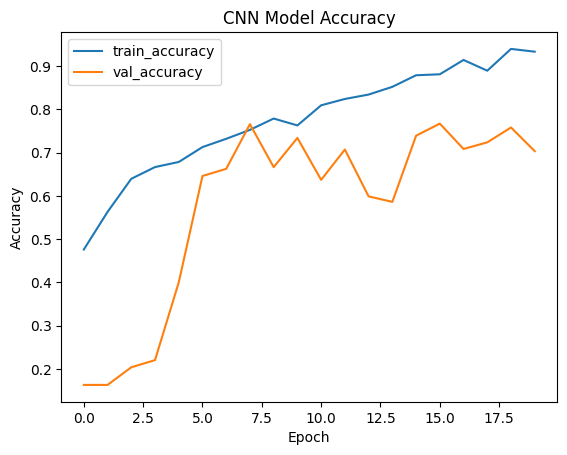

In [28]:
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)